# Lab 3: Probability Distributions and Random Sampling 

**Name(s):**

1.

2.

3.

<br>

---

In this notebook, we will have a look at sampling from the normal probability distribution, and using samples from these distributions to approximate probabilities for some fun processes.

<br>

---

## Exercise 1 - Sampling from the normal distribution

Last time, we saw that we could draw samples from an exponential distribution using the `rexp` function. We can do a similar thing for lots of other probability distributions too!

Run the commands below to draw `n=2` samples from a standard normal distribution using the `rnorm` function. We know we are using the standard normal distribution because the `mean` and `sd` arguments provide the distribution's mean ($\mu$) and standard deviation ($\sigma$).

Then, the `hist` function with the given arguments will make a plot of the histogram of `z`, where the provided arguments give:
* `xlim`: the range of x values to be plotted
* `xlab`: the x-axis label
* `ylab`: the y-axis label
* `main`: the main plot title
* `freq`: should we plot a _frequency_ histogram? (TRUE or FALSE) FALSE means that the plot will be normalized to have area = 1 under it, like a proper probability distribution.

In [ ]:
# draw 2 samples from the standard normal distribution
z <- rnorm(n=2, mean=0, sd=1)

# make a histogram of the results
hist(z, xlim=c(-4,6), xlab="a x-axis label", ylab="a y-axis label", main="what is yeet?", freq=FALSE)

### Task 1:

Modify the code from above to draw $n=10,000$ samples from the standard normal distribution. Then, make a probability density histogram that shows the range of values from -10 to 10, with x-axis, y-axis and main plot labels that are better related to what we are plotting.

In [ ]:
# MODIFY THIS CODE:

# draw 2 samples from the standard normal distribution
z <- rnorm(n=2)

# make a histogram of the results
hist(z, xlim=c(-4,6), xlab="a x-axis label", ylab="a y-axis label", main="what is yeet?", freq=FALSE)

### Task 2:

Now s'pose you want to draw from the normal distribution that is centered at 3 with a standard deviation of 2. In what ways do you expect this histogram to be different from the one above? Why?


### Task 3:

Modify your code to draw 10,000 samples from $N(\mu=3, \sigma=2)$ and plot the probability density histogram. Instead of `z`, call your sample `x` because it is no longer a _standard_ normal random variable.

### Task 4:

Now suppose you can only sample from the standard normal distribution, $N(\mu=0, \sigma=1)$. How can we take those samples and perform a simple transformation so that the modified samples are from $N(\mu=3, \sigma=2)$? Sample $Z$ from the standard normal, perform the appropriate transformation and store the modified values in a new array $y$, and plot the density histogram of $y$. Does it match your histogram from Question 3? (it should!)

### Task 5:

We can evaluate the normal probability density function using the function `dnorm`. `dnorm` uses the same `mean` and `sd` arguments to declare the mean and standard deviation of the normal pdf that you want to evaluate. Another argument, `x`, denotes which value(s) you want to plug into the pdf. For example, to evaluate the standard normal pdf at $x=0$, we could do:

In [ ]:
dnorm(x=0, mean=0, sd=1)

To evaluate the standard normal pdf at both $x=0$ and $x=1$, we can use the `c()` notation in R to _concatenate_ the two numbers and plug both in. The `dnorm` function is so gosh-darn clever that it will give us _both_ values. What a delight!

In [ ]:
dnorm(x=c(0,1), mean=0, sd=1)

Calculate $f(x=0; \mu=0, \sigma=1)$ and $f(x=1; \mu=0, \sigma=1)$ by hand below, using R only as a calculator. That is, _do not_ use the `dnorm` function for this part, but compare your results to those from `dnorm` above. Recall the the normal pdf is:
$$f(x; \mu, \sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Also note that in R:
* `sqrt()` gives you the square root of whatever is in the parentheses, 
* `exp(stuff)` gives you $e^{\text{stuff}}$,
* `3^4` gives you $3^4$ (for example), and
* `pi` gives you - you guessed it - $\pi$.

Do your values match what the `dnorm` function gives? (they should!)

<br>

So here's the thing. Histograms are discrete - the boxes have a definite beginning and end. You can pick out a box and hold it in your arms. It is a beautiful thing.

But the normal distribution, which our histogram is an approximation of, is continuous. It is cold and distant. It never tells you how it really feels. But we can use a histogram to approximate how a normal distribution really feels. Or something like that. Yikes. Moving on... 

So anyway, let's plot the actual normal pdf on top of our histogram from $N(\mu=3, \sigma=2)$. First, we can define a set of $x$ values at which to plot using the `seq()` function:

In [ ]:
x <- seq(from=0, to=0, by=0)

### Task 6:

The above code doesn't do anything useful... _yet_. Change `from` and `to` to match the lower and upper bounds that you want along the horizontal axis. Change the `by` argument to be some small increment that you would like between your x values. Once we actually make the plot, you might want to come back and change it to make your plot look nicer. Don't worry too much about it for now, but pick something less than 1 but greater than 0.

Now evaluate the normal pdf $N(\mu=3,\sigma=2)$ at all of those x values. Save the results in a new array, `fx`.

In [ ]:
fx <- dnorm(x, mean=3, sd=2)

We can plot the normal pdf on its own using the `plot` function. The first argument gives the x values to plot up, and the second argument gives the y values. The argument `type='l'` means that we want to make a line plot. `type='p'` would mean we want to generate a scatter (point) plot.

In [ ]:
plot(x, fx, type='l')

Now we want this plot to be superimposed on our previous histogram. We can do this using the `lines` function. It works exactly like `plot`, but will let us make our histogram first, then add the normal pdf.

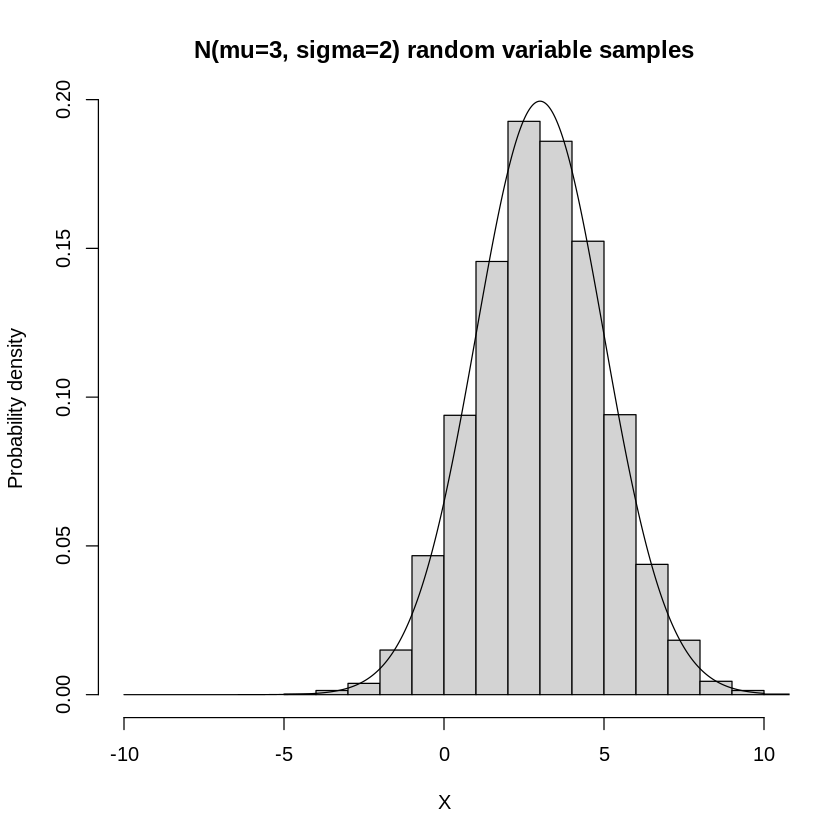

In [ ]:
# draw from N(mu=3, sigma=2)
x1 <- rnorm(n=10000, mean=3, sd=2)

# make a histogram of the results
hist(x1, xlim=c(-10,10), xlab="X", ylab="Probability density", main="N(mu=3, sigma=2) random variable samples", freq=FALSE)

# add the normal pdf
lines(x, fx, type='l')

### Task 7:

In the original code to generate our histogram from $N(3,2)$, I used

`x <- rnorm(n=10000, mean=3, sd=2)`

Why did I change the variable name to `x1` above?

### Task 8:

You can add arguments `col` to change the color of the line that you plotted of the normal pdf, and `lwd` to change the width of the line. Pick a new color of your choice from [here](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf) and make the line a bit thicker so it's easier to see.

For example, `lines(x, fx, col="black", lwd=1)` is the BORING default.

<br> 

### Task 9:

Based on your sample `x1` that was drawn from $N(\mu=3, \sigma=2)$, estimate the probability that $X < 0$. Recall that the `which` command was useful in a previous lab notebook for finding all the locations in an array where certain conditions were true.

<br>

### Task 10:

We can obtain the normal cumulative distribution function by using the `pnorm` function. It works exactly like `dnorm` and `rnorm`, except now the first argument is a value `q` that we are plugging into the cdf. So:

$$F(q; \mu, \sigma) = \texttt{pnorm}(q, \texttt{mean}=\mu, \texttt{sd}=\sigma)$$ 

Using `pnorm`, calculate the actual probability that $X < 0$, where $X \sim N(\mu=3, \sigma=2)$. Compare this to your estimate from Question 9. How could you revise your estimate from Question 9 if you want to improve it?

<br>

---

## Exercise 2 - Grading Schemes

The following picture depicts a much-often spouted fact in statistics classes that roughly $68\%$ of the probability for a normal distribution falls within 1 standard deviation of the mean, roughly $95\%$ falls within two standard deviations of the mean, and so forth.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)



<br>

### Task 11:

Use the standard normal distribution to verify the first fact, that roughly $68\%$ of the probability in the standard normal distribution falls between $\mu-\sigma = -1$ and $\mu+\sigma = 1$. Recall from Question 10 that `pnorm` computes the normal cdf.

<br>

### Task 12:

Suppose the grades from an Underwater Basket Weaving exam roughly follow a normal distribution with mean 70 and standard deviation 15. What percentage of the students earned C's and B's? Use a standard grade breakdown where grades less than 60 are an F, less than 70 are a D, and so forth. Count things like C-'s and B+'s as C's and B's.

<br>

### Task 13:

A common curving scheme in university courses is to set the Pass mark of a class at some number of standard deviations below the mean, $\mu - Z\sigma$, where $Z$ is some positive constant. That is, if the overall mean of the course is low, instead of holding back people with grades of $69$ or lower, professors will lower the cutoff point to $\mu - Z\sigma$.  (Of course, if the mean of the course is higher than usual we don't apply this rule, because we're not monsters.)

Suppose a professor decides to set the cutoff at 1 standard deviation below the mean. If the grades at the end of a course roughly follow a normal distribution with mean $70$ and standard deviation $15$, what is the cutoff point for passing the class?

<br>

### Task 14:

What percentage of students would pass the class?  